In [1]:
import awkward as ak
import hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import PackedSelection
import json
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt

In [2]:
filename = "/home/prayag/Coffea/data/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root"
events = NanoEventsFactory.from_root(
    filename,
    schemaclass=NanoAODSchema.v7
).events()

In [3]:
from monoHbbtools import Load

In [4]:
fileset = Load.Loadfileset("../monoHbbtools/Load/newfileset.json")
fileset_dict = fileset.getraw()
fileset_dict

{'Data': {'MET_Run2018': {'MET_Run2018A': ['root://cmsxrootd.fnal.gov///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/0F8C0C8C-63E4-1D4E-A8DF-506BDB55BD43.root',
    'root://cmsxrootd.fnal.gov///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/10C73E73-0C15-2F4B-9E0B-E3DE1C54A597.root',
    'root://cmsxrootd.fnal.gov///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/1E8B7F5A-4B29-8F46-B2E1-549805E5CBB2.root',
    'root://cmsxrootd.fnal.gov///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/1ED54027-5256-064F-A776-C10A0920256A.root',
    'root://cmsxrootd.fnal.gov///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/4480C919-0BD7-B74D-8B6A-BFF37A1DB4DF.root',
    'root://cmsxrootd.fnal.gov///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/4C8B6DD1-441E-1E4C-87E9-B7D97060E508.root',
    'root://cmsxrootd.fnal.gov///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_Nan

In [5]:
Load.buildFileset(fileset_dict["Data"]["MET_Run2018"], redirector="wisc")

{'MET_Run2018A': ['root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/0F8C0C8C-63E4-1D4E-A8DF-506BDB55BD43.root',
  'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/10C73E73-0C15-2F4B-9E0B-E3DE1C54A597.root',
  'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/1E8B7F5A-4B29-8F46-B2E1-549805E5CBB2.root',
  'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/1ED54027-5256-064F-A776-C10A0920256A.root',
  'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/4480C919-0BD7-B74D-8B6A-BFF37A1DB4DF.root',
  'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/4C8B6DD1-441E-1E4C-87E9-B7D97060E508.root',
  'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2

In [6]:
Load.make_fileset(fileset_dict, Redirector="wisc")

{'Data': {'MET_Run2018': {'MET_Run2018A': ['root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/0F8C0C8C-63E4-1D4E-A8DF-506BDB55BD43.root',
    'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/10C73E73-0C15-2F4B-9E0B-E3DE1C54A597.root',
    'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/1E8B7F5A-4B29-8F46-B2E1-549805E5CBB2.root',
    'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/1ED54027-5256-064F-A776-C10A0920256A.root',
    'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/4480C919-0BD7-B74D-8B6A-BFF37A1DB4DF.root',
    'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/110000/4C8B6DD1-441E-1E4C-87E9-B7D97060E508.root',
    'root://pubxrootd.hep.wisc.edu///store/data/Run2018A/MET/

In [14]:
import hist
import mplhep as hep
plt.style.use(hep.style.CMS)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f5588cb0130>, errorbar=None, legend_artist=None)]

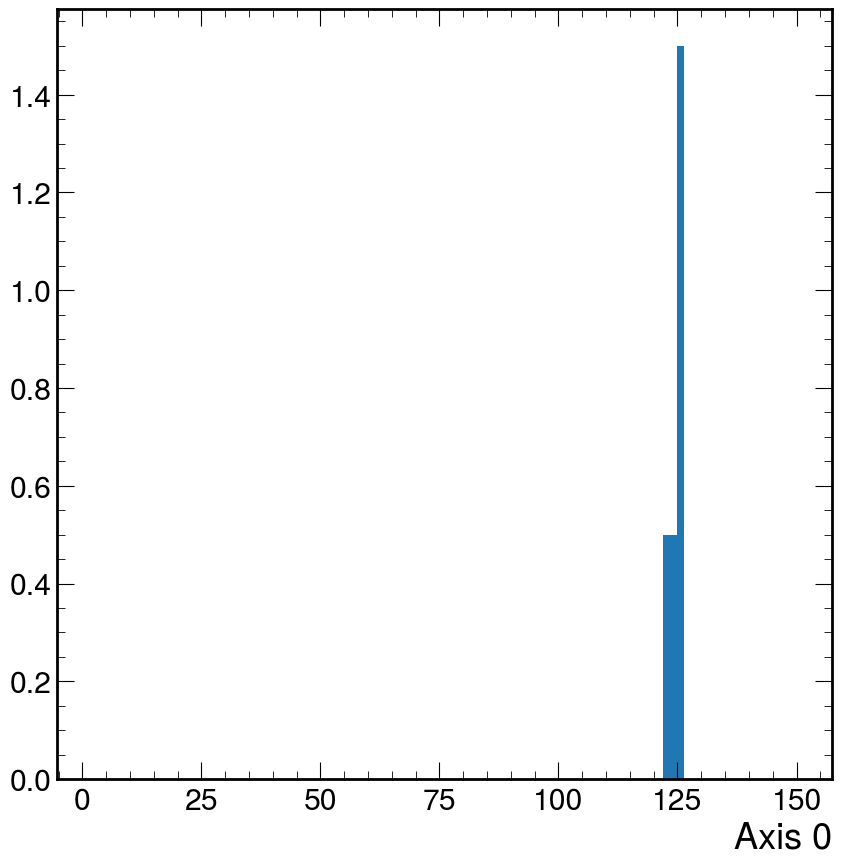

In [19]:
h = hist.Hist.new.Reg(100,150,2).Double()
h.fill([125,125,122,124,126])
hep.histplot(
    h*0.5,
    histtype="fill"
)